## k−NN を使った手書き文字認識

### MNIST Data のダウンロード

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
X, y = shuffle(mnist.data, mnist.target)
X = X / 255.0
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X, dev_X , train_y, dev_y = train_test_split(train_X, train_y, test_size=0.2)

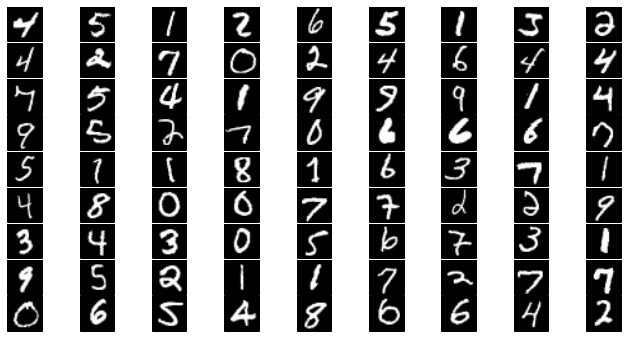

In [4]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28,28)), cmap='gray')

### Cosine 類似度

In [5]:
norm = numpy.linalg.norm(train_X, ord=2, axis=1)
normalized_train_X = train_X / norm[:,numpy.newaxis]

In [6]:
sample_1 = normalized_train_X[0]
sample_2 = normalized_train_X[1]
print numpy.dot(sample_1, sample_2)

0.484656836449


In [8]:
#http://openbook4.me/sections/1452
from pandas import DataFrame, Series
def kNN(train_X, train_y, test_X):
 
    #正規化  2ノルムでわっている
    norm_train = numpy.linalg.norm(train_X, ord=2, axis=1)
    normalized_train_X = train_X / norm_train[:,numpy.newaxis]
    norm_test = numpy.linalg.norm(test_X, ord=2, axis=1)
    normalized_test_X = test_X / norm_test[:,numpy.newaxis]
    norm_dev = numpy.linalg.norm(dev_X, ord=2, axis=1)
    normalized_dev_X = dev_X / norm_dev[:,numpy.newaxis]
 
    #f値によってkを決定している。
    f1 = []
    for k in [3,5,10, 50]:
        pred =[]
        n = 100 if len(normalized_test_X)  >=  100 else len(normalized_test_X)
        for i in range(n):
            score = numpy.dot(normalized_dev_X, normalized_test_X[i])
            most_similar = sorted([ [s, l] for s, l  in zip(score, dev_y)], reverse = True)
            ranking = most_similar[:k]
            pred.append(Series(map(lambda x: x[1], ranking)).value_counts().index[0])
        f1.append(f1_score(test_y[:n], pred, average='macro'))
    k = [3,5,10,50][numpy.argmax(f1)]
 
    #コサイン距離が1に近いものをランキングにして、k近傍法をつかっている。
 
    N = len(test_X)
    pred_y =[]
    for i in range(N):
        score = numpy.dot(normalized_train_X, normalized_test_X[i])
        most_similar = sorted([ [s, l] for s, l  in zip(score, train_y)], reverse = True)
        ranking = most_similar[:k]
        pred_y.append(Series(map(lambda x: x[1], ranking)).value_counts().index[0])
        #valuecount順にならべて一番大きい値をとるindexをもとめる
 
    return pred_y

### k-NN でテストデータに対する予測

In [9]:
pred_y = kNN(train_X[:10000], train_y, test_X[:300])
f1_score(test_y[:len(pred_y)], pred_y, average='macro')

0.97172523609878036